In [27]:
import pandas,numpy
import scipy,scipy.stats
import sklearn,sklearn.decomposition
import matplotlib,matplotlib.pyplot

# 1. User defined variables

In [2]:
proteomics_file='/Volumes/omics4tb2/alomana/projects/uwm/data/Fo-normalized-MS-073119.txt'
results_dir='/Volumes/omics4tb2/alomana/projects/uwm/results/'

# 2. Read data

In [3]:
df=pandas.read_csv(proteomics_file,skiprows=2,usecols=[3,4,5,9,10,11],sep='\t',thousands=',')
print(df.shape)
df.head()

(1864, 6)


,Identified Proteins (1862),Accession Number,Alternate ID,HMDM,THP-1,iMAC
0,"Actin, cytoplasmic 2 OS=Homo sapiens OX=9606 G...",ACTG_HUMAN,ACTG1,3628.7,4179.1,2884.8
1,Vimentin OS=Homo sapiens OX=9606 GN=VIM PE=1 SV=4,VIME_HUMAN,VIM,3068.2,1475.1,1790.4
2,Elongation factor 1-alpha 1 OS=Homo sapiens OX...,EF1A1_HUMAN,EEF1A1,1474.7,1983.9,1165.6
3,Pyruvate kinase PKM OS=Homo sapiens OX=9606 GN...,KPYM_HUMAN,PKM,1475.9,1312.1,1284.9
4,Glyceraldehyde-3-phosphate dehydrogenase OS=Ho...,G3P_HUMAN,GAPDH,1822.7,1164.2,1632.0


In [4]:
df.dropna(axis=0,inplace=True,how='all')
df.shape

(1862, 6)

In [5]:
adata = df.iloc[:,-3:].to_numpy()
print(adata.shape)
adata

(1862, 3)


array([[3.6287e+03, 4.1791e+03, 2.8848e+03],
       [3.0682e+03, 1.4751e+03, 1.7904e+03],
       [1.4747e+03, 1.9839e+03, 1.1656e+03],
       ...,
       [0.0000e+00, 0.0000e+00, 1.7573e+00],
       [0.0000e+00, 0.0000e+00, 1.7271e+00],
       [0.0000e+00, 0.0000e+00, 1.7271e+00]])

# 3. Transform data

In [17]:
zscore=scipy.stats.zscore(adata,axis=1)
print('zscore',zscore)

acc [1.06926e+04 6.33370e+03 4.62420e+03 ... 1.75730e+00 1.72710e+00
 1.72710e+00]
zscore [[ 0.1216154   1.15940018 -1.28101558]
 [ 1.38930075 -0.92352278 -0.46577797]
 [-0.19769848  1.31156787 -1.11386939]
 ...
 [-0.70710678 -0.70710678  1.41421356]
 [-0.70710678 -0.70710678  1.41421356]
 [-0.70710678 -0.70710678  1.41421356]]


In [31]:
transpose=numpy.transpose(zscore)
transpose

array([[ 0.1216154 ,  1.38930075, -0.19769848, ..., -0.70710678,
        -0.70710678, -0.70710678],
       [ 1.15940018, -0.92352278,  1.31156787, ..., -0.70710678,
        -0.70710678, -0.70710678],
       [-1.28101558, -0.46577797, -1.11386939, ...,  1.41421356,
         1.41421356,  1.41421356]])

In [38]:
pca=sklearn.decomposition.PCA(n_components=2)
principalComponents=pca.fit_transform(transpose)
principalDf=pandas.DataFrame(data=principalComponents,columns=['PC1','PC2'])
principalDf.head()

In [81]:
explained=pca.explained_variance_ratio_
print(explained)

[0.5982002 0.4017998]


# 4. Visualization

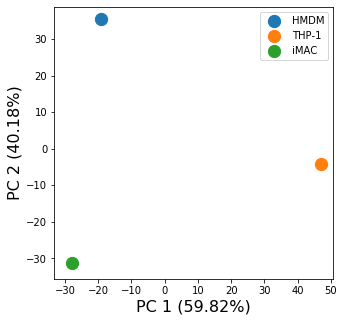

In [79]:
fig = matplotlib.pyplot.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1 ({:.2f}%)'.format(explained[0]*100),fontsize=16)
ax.set_ylabel('PC 2 ({:.2f}%)'.format(explained[1]*100),fontsize=16)
labels=['HMDM','THP-1','iMAC']
for i in range(3):
    ax.scatter(principalDf['PC1'][i],principalDf['PC2'][i],s=150,label=labels[i])
matplotlib.pyplot.legend()

In [ ]:
# analysis

In [125]:
#g=seaborn.clustermap(numpy.log2(adata+1),cmap='viridis',xticklabels=labels)
flights = seaborn.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
#proteins=df.pivot('HMDM','THP-1','iMAC')
#seaborn.clustermap(proteins,cmap='viridis')
flights


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [126]:
df

,Identified Proteins (1862),Accession Number,Alternate ID,HMDM,THP-1,iMAC
0,"Actin, cytoplasmic 2 OS=Homo sapiens OX=9606 G...",ACTG_HUMAN,ACTG1,3628.7000,4179.1000,2884.8000
1,Vimentin OS=Homo sapiens OX=9606 GN=VIM PE=1 SV=4,VIME_HUMAN,VIM,3068.2000,1475.1000,1790.4000
2,Elongation factor 1-alpha 1 OS=Homo sapiens OX...,EF1A1_HUMAN,EEF1A1,1474.7000,1983.9000,1165.6000
3,Pyruvate kinase PKM OS=Homo sapiens OX=9606 GN...,KPYM_HUMAN,PKM,1475.9000,1312.1000,1284.9000
4,Glyceraldehyde-3-phosphate dehydrogenase OS=Ho...,G3P_HUMAN,GAPDH,1822.7000,1164.2000,1632.0000
5,Alpha-enolase OS=Homo sapiens OX=9606 GN=ENO1 ...,ENOA_HUMAN,ENO1,978.8100,1128.3000,758.1600
6,Cathepsin D OS=Homo sapiens OX=9606 GN=CTSD PE...,CATD_HUMAN,CTSD,1354.6000,395.1500,1003.3000
7,Myosin-9 OS=Homo sapiens OX=9606 GN=MYH9 PE=1 ...,MYH9_HUMAN,MYH9,736.6100,771.7100,606.9800
8,Gelsolin OS=Homo sapiens OX=9606 GN=GSN PE=1 SV=1,GELS_HUMAN,GSN,227.3500,590.2200,1018.2000
9,Tubulin beta chain OS=Homo sapiens OX=9606 GN=...,TBB5_HUMAN,TUBB,627.4500,627.2800,692.8500


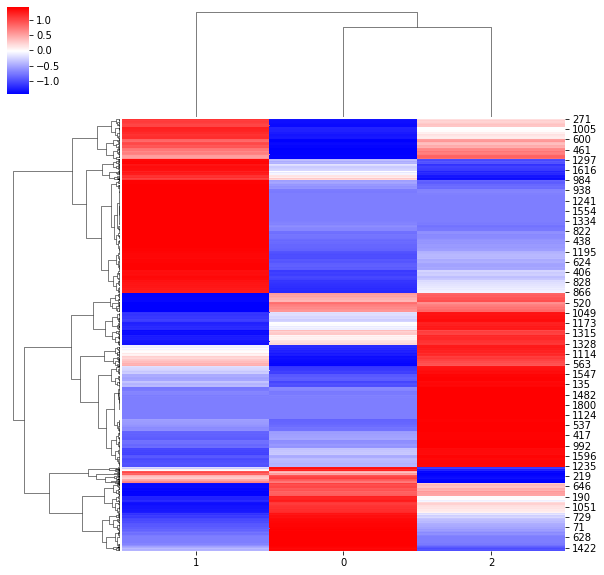

In [89]:
import seaborn
seaborn.clustermap(zscore,cmap='bwr')

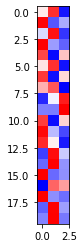

In [87]:
matplotlib.pyplot.imshow(zscore[:20],cmap='bwr')

In [ ]:
# do a rank correlation
# do a histogram of fold change of higher than 0.05 percentile of all protein expressions or top 500 highly expressed